In [1]:
import cdms2 as cdms
import MV2 as MV
import cdtime,cdutil,genutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import string
import glob
import scipy.stats as stats
# Local solution
# If running remotely, uncomment the following code:
# %%bash
# git clone https://github.com/katemarvel/CMIP5_tools
# import CMIP5_tools as cmip5
import sys,os
sys.path.append("/Users/kmarvel/Google Drive/python-utils")

import CMIP5_tools as cmip5
import DA_tools
import Plotting

from eofs.cdms import Eof
from eofs.multivariate.cdms import MultivariateEof
%matplotlib inline

In [2]:
def get_averages(region,variable,experiment):
    readstem="/Users/kmarvel/Documents/DATA/dester/regional_averages/"
   
   
   
    readdirec=readstem+region+"/"+variable+"/"+experiment+"/"

    fnames=glob.glob(readdirec+"*")
    nfiles=len(fnames)
    i=0
    fil=fnames[i]
    f=cdms.open(fil)
    data=f(variable)
    tax=data.getTime()
    ntime=len(tax)
    alldata=MV.zeros((nfiles,ntime))+1.e20
    alldata[i]=data
    for i in range(nfiles)[1:]:
        fil=fnames[i]
        f=cdms.open(fil)
        data=f(variable)
        if len(data.getTime())==ntime:
            alldata[i]=data
        f.close()
        
    alldata.setAxis(1,tax)    
    modax=cmip5.make_model_axis(fnames)
    alldata.setAxis(0,modax)
    return MV.masked_where(np.abs(alldata)>1.e10,alldata)

In [29]:
def plot_season(data,season,**kwargs):
    avg=MV.average(data,axis=0)
    cdutil.setTimeBoundsMonthly(avg)
    Plotting.time_plot(getattr(cdutil,season)(avg),**kwargs)

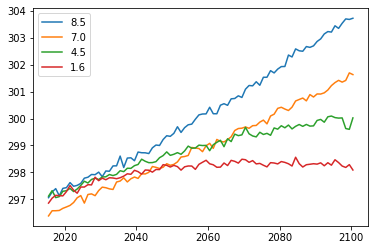

In [30]:
#plot_season(historical)
plot_season(ssp585,"JJA",label="8.5")
plot_season(ssp370,"JJA",label="7.0")
plot_season(ssp245,"JJA",label="4.5")
plot_season(ssp126,"JJA",label="1.6")
plt.legend()

In [47]:
class Averages():
    def __init__(self,variable):
        self.variable=variable
        self.historical=get_averages("southwest",variable,"historical")

        self.ssp585=get_averages("southwest",variable,"ssp585")

        self.ssp370=get_averages("southwest",variable,"ssp370")

        self.ssp126=get_averages("southwest",variable,"ssp126")
        self.ssp245=get_averages("southwest",variable,"ssp245")
    def plot_all(self,season):
        plot_season(self.ssp585,season,label="8.5")
        plot_season(self.ssp370,season,label="7.0")
        plot_season(self.ssp245,season,label="4.5")
        plot_season(self.ssp126,season,label="1.6")
        plt.legend()
        plt.title(self.variable)

In [48]:
TAS=Averages("tas")
PR=Averages("pr")
MRROS=Averages("mrros")
MRSO = Averages("mrso")
MRSOS = Averages("mrsos")

In [49]:
EV = Averages("evspsbl")

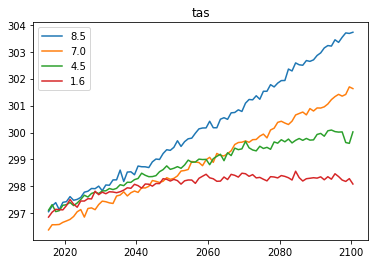

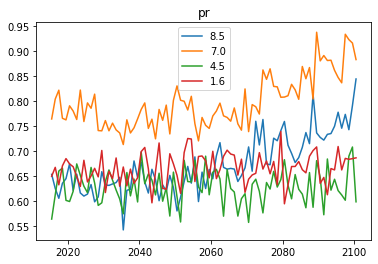

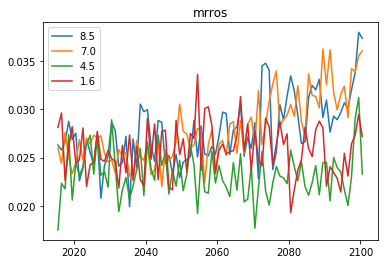

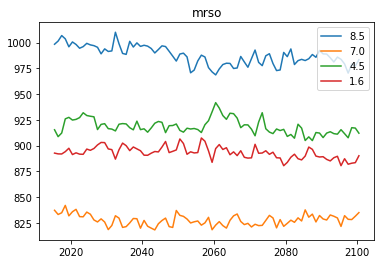

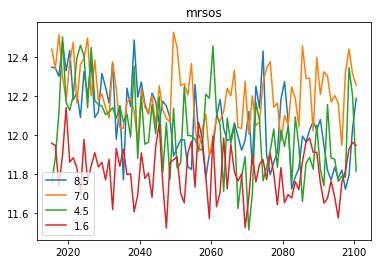

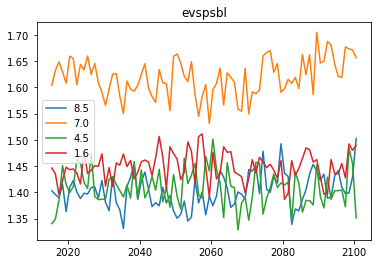

In [50]:
plt.figure()
TAS.plot_all("JJA")
plt.figure()
PR.plot_all("JJA")
plt.figure()
MRROS.plot_all("JJA")
plt.figure()
MRSO.plot_all("JJA")
plt.figure()
MRSOS.plot_all("JJA")
plt.figure()
EV.plot_all("JJA")

In [10]:
#def concatenate_piControl():
readstem="/Users/kmarvel/Documents/DATA/dester/regional_averages/"
readdirec=readstem+region+"/"+variable+"/piControl/"
fnames=glob.glob(readdirec+"*")
    nfiles=len(fnames)
    i=0
    fil=fnames[i]
    f=cdms.open(fil)
    data=f(variable)
    tax=data.getTime()
    ntime=len(tax)
    alldata=MV.zeros((nfiles,ntime))
    alldata[i]=data
    for i in range(nfiles)[1:]:
        fil=fnames[i]
        f=cdms.open(fil)
        data=f(variable)[:ntime]
        alldata[i]=data
        f.close()
        
    alldata.setAxis(1,tax)    
    modax=cmip5.make_model_axis(fnames)
    alldata.setAxis(0,modax)
    return alldata

IndentationError: unexpected indent (<ipython-input-10-6c5384d4e49b>, line 5)